In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

# Importing dataset

In [7]:
diamonds = pd.read_csv('input/diamonds-datamad0120/diamonds_train.csv')
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276



# Knowing the DataFrame

In [8]:
# Data types

diamonds.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [9]:
# Nulls

diamonds.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [15]:
# Duplicates

diamonds.duplicated().sum()

0

In [21]:
# Unique values for categorical series

cut = diamonds['cut'].unique()
color = diamonds['color'].unique()
clarity = diamonds['clarity'].unique()

print(cut, color, clarity)

['Premium' 'Ideal' 'Very Good' 'Fair' 'Good'] ['F' 'D' 'E' 'J' 'H' 'I' 'G'] ['VS1' 'SI1' 'VVS2' 'SI2' 'VS2' 'IF' 'VVS1' 'I1']


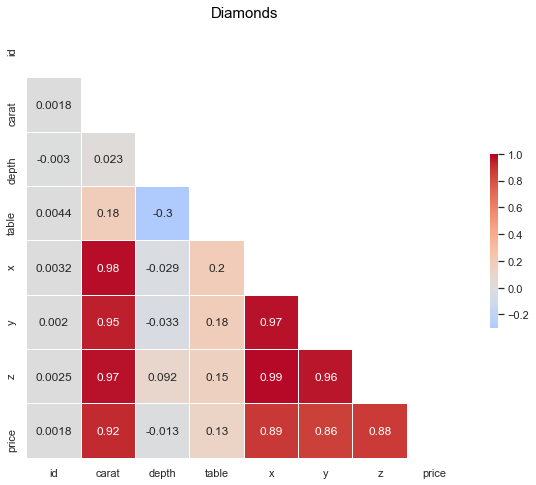

In [26]:
#Correlation Matrix
corr = diamonds.corr()
sns.set(style="white")
# Compute the correlation matrix
corr = diamonds.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = plt.cm.get_cmap("coolwarm")
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .4}, annot=True)
plt.title("Diamonds", fontsize=15, color="black", weight="medium")
sns.set()

It seems that series x, y and z are correlated. 

In [39]:
# Categorical series to numerical

diamonds_num = pd.get_dummies(diamonds)
diamonds_num.head()

,id,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.78,61.5,58.0,5.93,5.98,3.66,3446,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.31,60.8,56.0,4.37,4.32,2.64,732,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0.30,62.3,54.0,4.30,4.34,2.69,475,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1.04,62.0,58.0,6.54,6.46,4.03,9552,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.65,61.4,55.0,5.58,5.62,3.44,1276,0,0,...,0,1,0,0,1,0,0,0,0,0


In [56]:
diamonds_num = diamonds_num.drop(columns=['x', 'y', 'z'])

KeyError: "['x' 'y' 'z'] not found in axis"

In [57]:
diamonds_num.head()

,id,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.78,61.5,58.0,3446,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.31,60.8,56.0,732,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0.30,62.3,54.0,475,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1.04,62.0,58.0,9552,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.65,61.4,55.0,1276,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


# Model prediction with RandomForest Regression

Using RandomForest to predict price. I haven't dropped any column to check which ones the model suggests.

In [88]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_leaf=3, random_state=150)
selector = RFECV(rf_reg, step=1, cv=5)

In [89]:
predictors = ['id', 'carat', 'depth', 'table', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

In [90]:
X = diamonds_num[predictors]
y = diamonds_num['price']

In [ ]:
selector.fit(X, y)

In [ ]:
selector.n_features_

In [ ]:
pd.Series(predictors)[selector.support_.tolist()]

In [ ]:
predictors = pd.Series(predictors)[selector.support_.tolist()].tolist()

# Model training

In [ ]:
X = diamonds_num[predictors]
y = diamonds_num['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf_reg.fit(X_train, y_train)

In [ ]:
rf_reg.feature_importances_

In [ ]:
print(rf_reg.score(X_train, y_train))
print(rf_reg.score(X_test, y_test))

In [ ]:
print('RMSE', np.sqrt(mean_squared_error(y_test, rf_reg.predict(X_test))))